# **Challenge: If a tree falls in the forest...**

Now that you've learned about random forests and decision trees let's do an exercise in accuracy. You know that random forests are basically a collection of decision trees. But how do the accuracies of the two models compare?

So here's what you should do. Pick a dataset. It could be one you've worked with before or it could be a new one. Then build the best decision tree you can.

Now try to match that with the simplest random forest you can. For our purposes measure simplicity with runtime. Compare that to the runtime of the decision tree. This is imperfect but just go with it.

Hopefully out of this you'll see the power of random forests, but also their potential costs. Remember, in the real world you won't necessarily be dealing with thousands of rows. It could be millions, billions, or even more.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy
import seaborn as sns
import sklearn
from sklearn import tree
from sklearn import ensemble
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_boston
from IPython.display import Image
import pydotplus
import graphviz
import time
%matplotlib inline
sns.set_style('white')

boston = load_boston()
data = boston.data
target = boston.target

In [27]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [28]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [29]:
# Define data and target (X and Y)
X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
Y = df['MEDV']

# Decision Tree

[ 0.65420532  0.60177246  0.64442753  0.45281999 -1.1889964 ]
Runtime:  0.08913683891296387


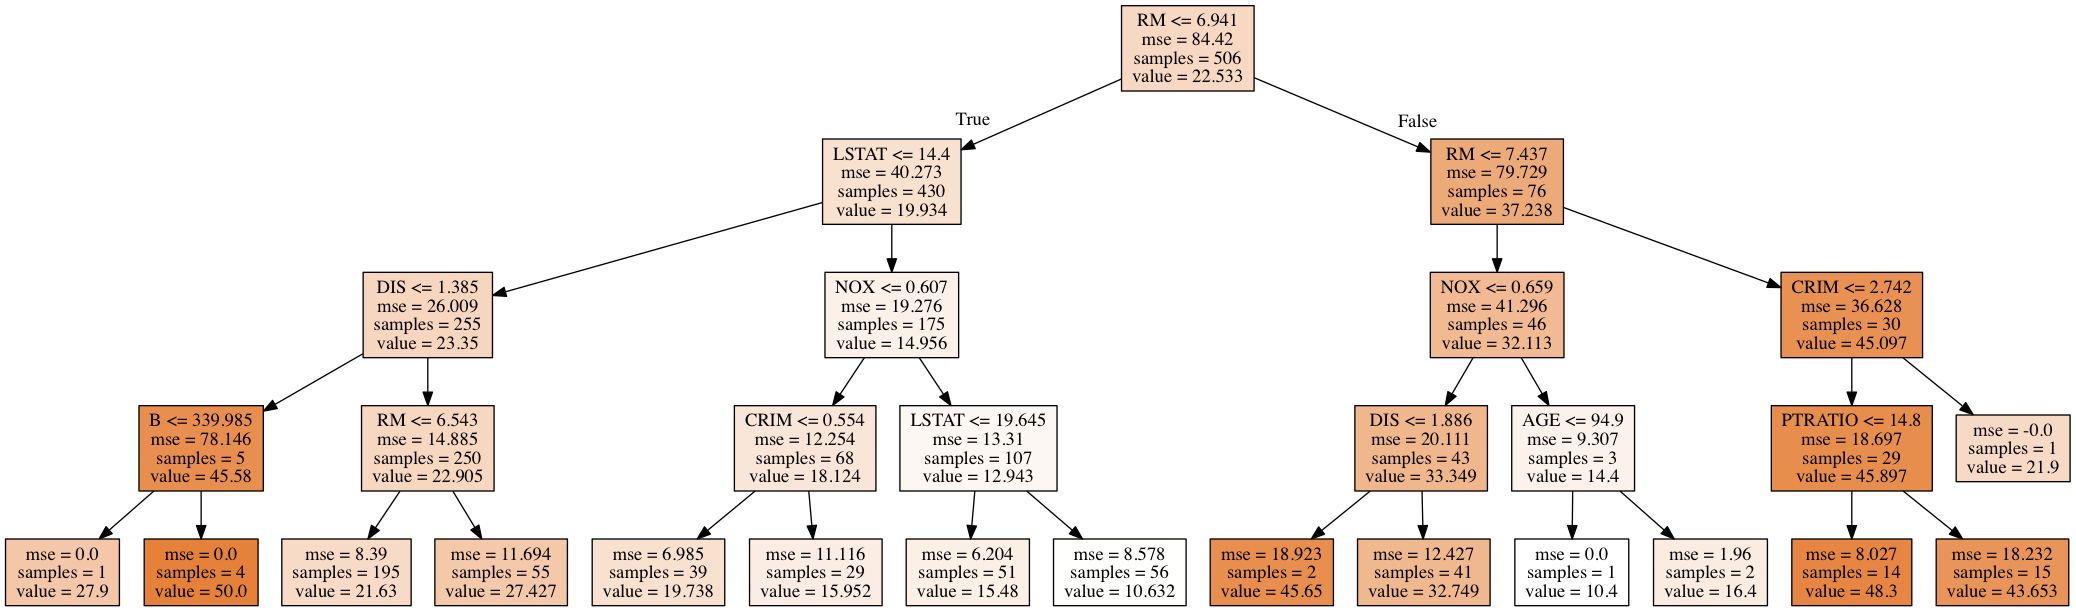

In [30]:
dt_start_time = time.time()

# Initialize and train our tree.
decision_tree = tree.DecisionTreeRegressor(
    criterion='mse',
    max_features=12,
    max_depth=4,
    random_state = 1337
)
decision_tree.fit(X, Y)

dt_scores = cross_val_score(decision_tree, X, Y, cv = 5)
dt_runtime = time.time() - dt_start_time

print(dt_scores)
print ("Runtime: ", dt_runtime)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=X.columns,
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# **Random Forest**

In [31]:
rfc_start_time = time.time()
rfc = ensemble.RandomForestRegressor()
rfc_scores = cross_val_score(rfc, X, Y, cv=5)
rfc_runtime = time.time() - rfc_start_time
runtime_ratio = rfc_runtime/dt_runtime

print(rfc_scores)
print("Runtime: ", rfc_runtime)
print("Runtime ratio: ", runtime_ratio)

[ 0.78138917  0.84839195  0.74816648  0.46629469 -0.03107048]
Runtime:  0.29137372970581055
Runtime ratio:  3.268836243904918


I built two models for the Boston house prices dataset, decision tree and random forest, with a cross-validation using 5 folds. While I was able to get better cross validation scores for the random forest, it took three times as long as the decision tree classifier, as evidenced by the runtime ratio of ~3. Thus, there is a time cost associated with using random forest, despite the improvement in performance.